<a href="https://colab.research.google.com/github/brsingh7/Data620_Spring24/blob/Project2/BrianSingh_Data620_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This data set shows the IMDB feature films & documentaries for approximately 10,000 actors. Data is as-of 5/5/21 and shows each actor, their IMDB ID, and the film/doc IMDB info. Only films/docs with at least 100 IMDB votes were counted. Actors were chosen to be any actor with at least one film/doc having 10K IMDB votes.

In [15]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [16]:
url = 'https://raw.githubusercontent.com/brsingh7/Data620_Spring24/Project2/actorfilms.csv'
actorfilms = pd.read_csv(url)
actorfilms.head()

,Actor,ActorID,Film,Year,Votes,Rating,FilmID
0,Fred Astaire,nm0000001,Ghost Story,1981,7731,6.3,tt0082449
1,Fred Astaire,nm0000001,The Purple Taxi,1977,533,6.6,tt0076851
2,Fred Astaire,nm0000001,The Amazing Dobermans,1976,369,5.3,tt0074130
3,Fred Astaire,nm0000001,The Towering Inferno,1974,39888,7.0,tt0072308
4,Fred Astaire,nm0000001,Midas Run,1969,123,4.8,tt0064664


I will aim to create a bipartite network of actors and movies and reduce the size to identify the top 10 actors based on degree centrality within the population and determine what movies are associated. With the dataset being hundreds of thousands of lines, I had to attempt a few filters -- I ended up using movies with a rating over 8.0 and released after the year 2000.

Top 10 Actors based on Degree Centrality:
John Ratzenberger
Vijay Sethupathi
Aamir Khan
Leonardo DiCaprio
Christian Bale
Michael Caine
Benedict Cumberbatch
Fahadh Faasil
Teresa Ganzel
Laraine Newman

Movies associated with the top 10 actors:
Batman Begins
Interstellar
Bangalore Days
Thondi Muthalum Driksakshiyum
Hamlet
Naduvula Konjam Pakkatha Kaanom
Dil Chahta Hai
Shutter Island
3 Idiots
Catch Me If You Can
Finding Nemo
96
Soul
Coco
Inside Out
1917
Inception
Maheshinte Prathikaaram
Rang De Basanti
Aandavan Kattalai
Anjathe
Lagaan: Once Upon a Time in India
Avengers: Infinity War
Kumbalangi Nights
Toy Story 3
Like Stars on Earth
Soodhu Kavvum
Monsters, Inc.
Super Deluxe
Dangal
Take Off
The Dark Knight
PK
Frankenstein
Avengers: Endgame
The Dark Knight Rises
Oh My Kadavule
WALL*E
12 Years a Slave
The Wolf of Wall Street
Django Unchained
Vikram Vedha
Howl's Moving Castle
The Prestige
The Departed
Up
Ford v Ferrari
Spirited Away
Pudhu Pettai


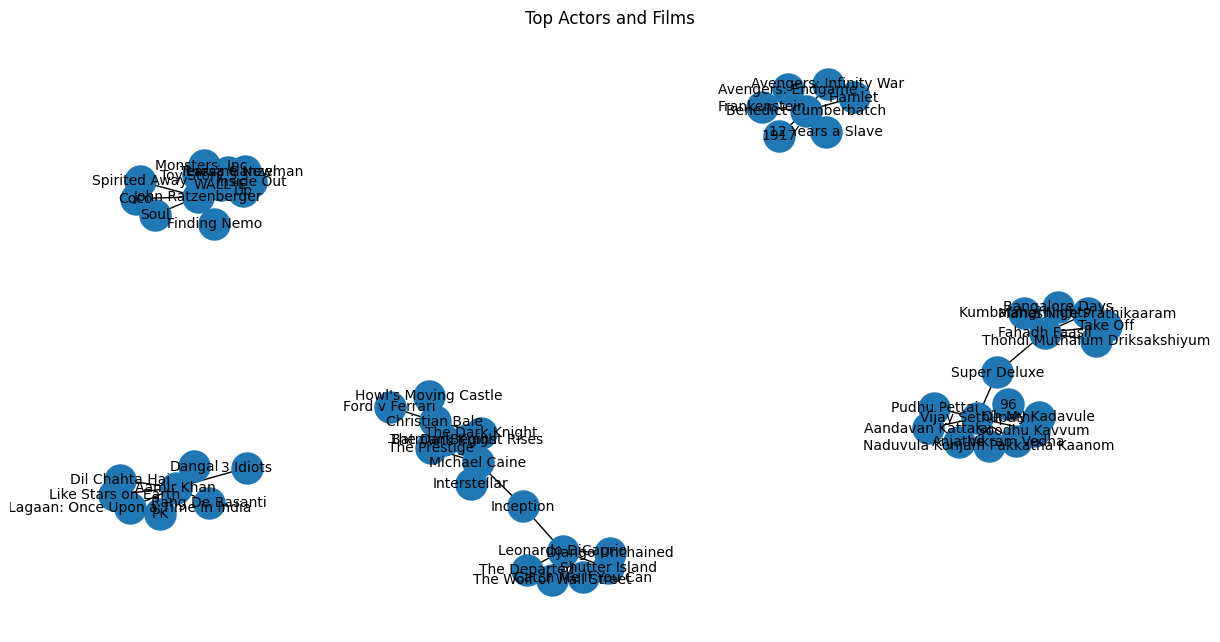

In [17]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

movie_data = pd.read_csv("https://raw.githubusercontent.com/brsingh7/Data620_Spring24/Project2/actorfilms.csv")

filtered_data = movie_data[(movie_data['Rating'] > 8.0) & (movie_data['Year'] > 2000)]

#empty bipartite graph
G = nx.Graph()

#add nodes
for n, row in filtered_data.iterrows():
    actor = row['Actor']
    film = row['Film']
    G.add_node(actor, bipartite=0)
    G.add_node(film, bipartite=1)
    G.add_edge(actor, film)

#reduce the size of the network
actor_degrees = dict(G.degree(actor for actor, attr in G.nodes(data=True) if attr['bipartite'] == 0))
top_actors = sorted(actor_degrees.items(), key=lambda x: x[1], reverse=True)[:10]
top_actor_names = [actor for actor, m in top_actors]
top_actor_films = set()
for actor in top_actor_names:
    top_actor_films.update(G.neighbors(actor))
top_subgraph = G.subgraph(top_actor_names + list(top_actor_films))

print("Top 10 Actors based on Degree Centrality:")
for actor in top_actor_names:
    print(actor)

print("\nMovies associated with the top 10 actors:")
for film in top_actor_films:
    print(film)

#plot the network
plt.figure(figsize=(12, 6))
pos = nx.spring_layout(top_subgraph)
nx.draw(top_subgraph, pos=pos, with_labels=True, node_size=500, font_size=10)
plt.title("Top Actors and Films")
plt.show()


We can see the top 10 actors in the network are John Ratzenberger, Vijay Sethupathi, Aamir Khan, Leonardo DiCaprio, Christian Bale ,Michael Caine, Benedict Cumberbatch, Fahadh Faasil, Teresa Ganzel, Laraine Newman. Some of these names are expected, while others are surprising. It is interesting to see the connections in some of the sub networks. We can perform calculations to see those who have the highest degree centrality, closeness centrality and betweeness centrality.

In [18]:
degree_centrality = nx.degree_centrality(top_subgraph)
closeness_centrality = nx.closeness_centrality(top_subgraph)
betweenness_centrality = nx.betweenness_centrality(top_subgraph)

centrality_data = {
    "Actor": top_actor_names,
    "Degree Centrality": [round(degree_centrality[actor], 5) for actor in top_actor_names],
    "Closeness Centrality": [round(closeness_centrality[actor], 5) for actor in top_actor_names],
    "Betweenness Centrality": [round(betweenness_centrality[actor], 5) for actor in top_actor_names]
}

centrality_df = pd.DataFrame(centrality_data)

# Print the DataFrame
print(centrality_df)

                  Actor  Degree Centrality  Closeness Centrality  \
0     John Ratzenberger            0.15517               0.16048   
1      Vijay Sethupathi            0.15517               0.14920   
2            Aamir Khan            0.12069               0.12069   
3     Leonardo DiCaprio            0.10345               0.10485   
4        Christian Bale            0.10345               0.09022   
5         Michael Caine            0.10345               0.12514   
6  Benedict Cumberbatch            0.10345               0.10345   
7         Fahadh Faasil            0.10345               0.12123   
8         Teresa Ganzel            0.08621               0.09934   
9        Laraine Newman            0.08621               0.09934   

   Betweenness Centrality  
0                 0.02259  
1                 0.05082  
2                 0.01270  
3                 0.03630  
4                 0.01815  
5                 0.03993  
6                 0.00907  
7                 0.03630  

We can see John Ratzenberger and Vijay Sethupathi have the highest degree and closeness centralities. This denotes that they have the highest number of connections in the network. Their closeness signifies that they are central to the network and have a short distance to other actors and movies throughout.

Interesting, while Vijay Sethupati has the highest betweenness centrality, Leonardo Dicaprio, Michael Caine, and Fahadh Faasil trail thereafter. This means they are connected within the network as they lie on most of the paths between nodes.